# Project 11 -- Dwijen Chawra

## Question 1

In [51]:
library(tidyverse)
library(ggplot2)
library(dplyr)
library(cowplot)

#  this is the beers sample data set
# /anvil/projects/tdm/data/beer/beers.csv
# /anvil/projects/tdm/data/beer/reviews_sample.csv

beers <- read_csv("/anvil/projects/tdm/data/beer/beers.csv")
reviews <- read_csv("/anvil/projects/tdm/data/beer/reviews_sample.csv")

print("printing the layout of beers data")
glimpse(beers)

print("printing the layout of reviews data")
glimpse(reviews)

print("printing the columns in the reviews data")
colnames(reviews)

# reviews %>%
#     gather(column, value, -beer_id, -username, -date, -text) %>%
#     ggplot(aes(x=value)) +
#     geom_histogram() +
#     facet_wrap(~column, scales="free")

# reviews_summary <- reviews %>%
#   group_by(beer_id) %>%
#   summarize(mean_score = mean(score))
# # head(reviews_summary)
# # dim(reviews_summary)
 
# beers <- beers %>%
#   rename(beer_id = id)

# reviews_summary <- reviews_summary %>%
#   rename(beer_goodness_indicator = mean_score)

# beers_reviews <- beers %>%
#   inner_join(reviews_summary, by = "beer_id")

beers <- beers %>%
  rename(beer_id = id)

# beers_reviews <- reviews %>%
#   group_by(beer_id) %>%
#   summarize(beer_goodness_indicator = mean(score)) %>%
#   inner_join(beers %>% select(beer_id, name), by = "beer_id")

beers_reviews <- reviews %>%
  group_by(beer_id) %>%
  summarize(beer_goodness_indicator = mean(score)) %>%
  inner_join(beers, by = "beer_id")
  




Rows: 358873 Columns: 10
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (6): name, state, country, style, availability, notes
dbl (3): id, brewery_id, abv
lgl (1): retired

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 999999 Columns: 10
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (2): username, text
dbl  (7): beer_id, look, smell, taste, feel, overall, score
date (1): date

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


[1] "printing the layout of beers data"
Rows: 358,873
Columns: 10
$ id           <dbl> 202522, 82352, 214879, 320009, 246438, 8036, 108605, 3453…
$ name         <chr> "Olde Cogitator", "Konrads Stout Russian Imperial Stout",…
$ brewery_id   <dbl> 2199, 18604, 44306, 4378, 44617, 3469, 22598, 45567, 1120…
$ state        <chr> "CA", NA, "IN", "WA", "PA", NA, "CA", NA, "AR", "SK", NA,…
$ country      <chr> "US", "NO", "US", "US", "US", "JP", "US", "IT", "US", "CA…
$ style        <chr> "English Oatmeal Stout", "Russian Imperial Stout", "Scott…
$ availability <chr> "Rotating", "Rotating", "Year-round", "Winter", "Rotating…
$ abv          <dbl> 7.3, 10.4, 4.0, 8.7, 5.1, 5.5, 5.6, 6.5, 4.3, 7.5, 5.0, 3…
$ notes        <chr> "No notes at this time.", "No notes at this time.", "No n…
$ retired      <lgl> FALSE, FALSE, TRUE, FALSE, FALSE, TRUE, FALSE, FALSE, FAL…
[1] "printing the layout of reviews data"
Rows: 999,999
Columns: 10
$ beer_id  <dbl> 271781, 125646, 125646, 125646, 125646, 125646, 1

[1] "beer_id"  "username" "date"     "text"     "look"     "smell"   
 [7] "taste"    "feel"     "overall"  "score"

## Question 2

Warning message:
“Removed 307 rows containing non-finite values (`stat_boxplot()`).”


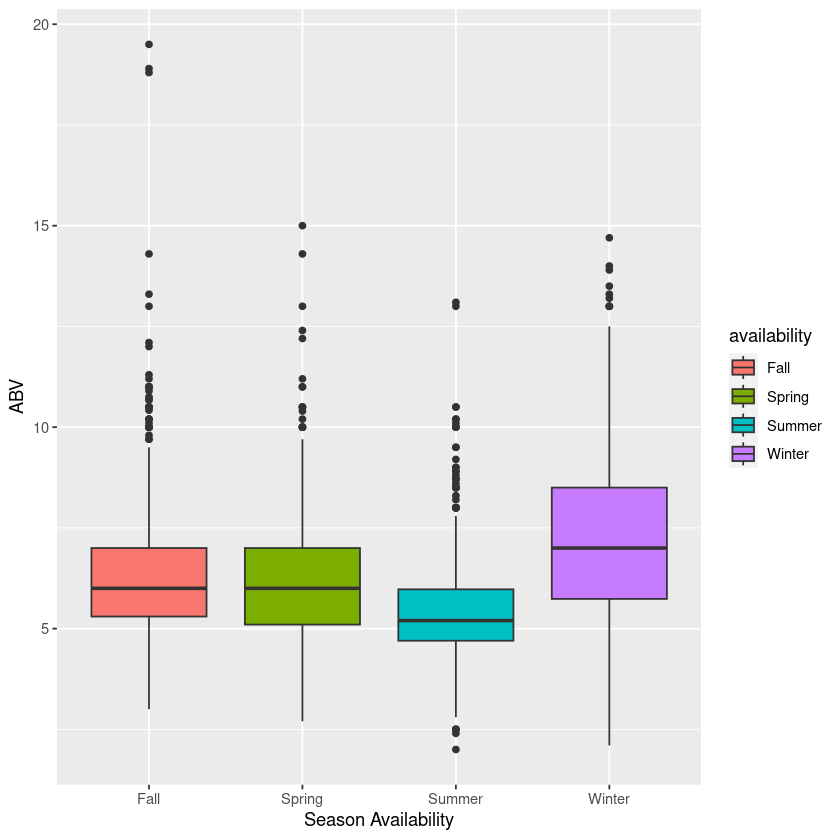

In [52]:
# Filter the beers_reviews dataset to contain beers available only in a specific season (Fall, Winter, Spring, Summer).

# beers_reviews %>%
#   filter(availability == "Fall")
beers_reviews_filtered <- beers_reviews %>%
  filter(availability %in% c("Spring", "Summer", "Fall", "Winter"))

ggplot(beers_reviews_filtered, aes(x=availability, y=abv, fill=availability)) +
  geom_boxplot() +
  labs(x = "Season Availability", y = "ABV")

Pretty much the results I expected, there is not too much variation between the seasons.

## Question 3

beer_id,beer_goodness_indicator,name,brewery_id,state,country,style,availability,abv,notes,retired,is_good
<dbl>,<dbl>,<chr>,<dbl>,<chr>,<chr>,<chr>,<chr>,<dbl>,<chr>,<lgl>,<dbl>
8,3.311286,Wheat,3,LA,US,American Adjunct Lager,Summer,4.20,"Wheat (May – September) German brewers discovered centuries ago that the addition of wheat produces a distinctively light, refreshing beer. Unlike traditional German wheat beers produced by other breweries, Abita Wheat is a lager, not an ale, and contains a generous amount of wheat which produces a clean, simple flavor.",TRUE,0
15,3.671329,Wild Goose Snow Goose Winter Ale,69,MD,US,Winter Warmer,Winter,6.30,No notes at this time.,TRUE,1
18,3.432000,Sommerbräu,8,OR,US,German Kölsch,Summer,4.80,No notes at this time.,TRUE,0
20,4.000426,Old Izaak,10,GB2,GB,English Extra Special / Strong Bitter (ESB),Winter,5.00,No notes at this time.,FALSE,1
28,3.450000,Wachusett Winter Fest Ale,20,MA,US,Winter Warmer,Winter,NA,No notes at this time.,TRUE,0
47,3.460455,Tremont Summer Ale,139,ME,US,American Pale Ale (APA),Summer,4.40,No notes at this time.,TRUE,0
49,3.577778,Tremont Winter Ale,139,ME,US,Winter Warmer,Winter,7.20,No notes at this time.,TRUE,1
58,4.082412,Grand Cru,4,ME,US,Belgian Strong Dark Ale,Winter,7.20,"Grand Cru is brewed with a touch of peated malt and spiced with coriander, sweet orange peel and a hint of anise. It is deep golden in color, full bodied and has hints of smoke and licorice in the taste and aroma. The malty, warming finish is perfect for colder weather.",FALSE,1
72,3.454912,Redhook Nut Brown,18134,NH,US,English Brown Ale,Spring,5.80,"Ah, Spring…the season that keeps us guessing. Will it rain, or will the sun be out? Do I take advantage of the last days of skiing, or the first days of hiking? Do I put on jeans, or dare break out the shorts? The season comes with enough uncertainty, so Redhook gives you something you can always count on…our Nut Brown Ale. This medium dark beer is layered with rich malty aromas and flavors of chocolate, caramel, brown sugar, and a hint of vanilla. Although it may be dark in color, it’s refreshingly smooth and highly sessionable. Nut Brown is the perfect beer for spring.",TRUE,0


Warning message:
“Removed 307 rows containing non-finite values (`stat_boxplot()`).”


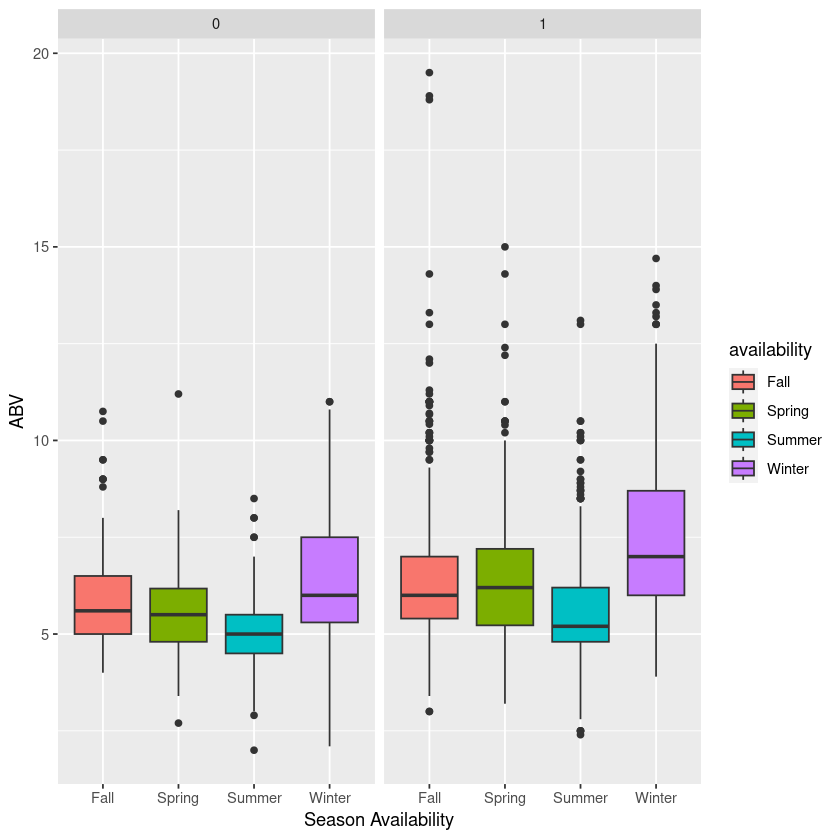

In [53]:
beers_reviews_filtered_isgood <- beers_reviews_filtered %>%
  mutate(is_good = ifelse(beer_goodness_indicator > 3.5, 1, 0))

beers_reviews_filtered_isgood

ggplot(beers_reviews_filtered_isgood, aes(x=availability, y=abv, fill=availability)) +
  geom_boxplot() +
  labs(x = "Season Availability", y = "ABV") +
  facet_wrap(~ is_good)

This is also expected, I was expecting the better beers to be a little more alcoholic, but I was intrigued by the jump in spring beers.

## Question 4

In [54]:
# beers_stats <- beers_reviews_filtered_isgood %>%
#   group_by(is_good, availability) %>%
#   summarize(mean_abv = mean(abv), median_abv = median(abv), std_abv = sd(abv))

beers_stats <- beers_reviews_filtered_isgood %>%
  group_by(is_good, availability) %>%
  summarize(mean_abv = ifelse(n() > 1, mean(abv, na.rm = TRUE), NA_real_),
            median_abv = ifelse(n() > 1, median(abv, na.rm = TRUE), NA_real_),
            std_abv = ifelse(n() > 1, sd(abv, na.rm = TRUE), NA_real_)) %>%
  ungroup() %>%
  select(is_good, availability, mean_abv, median_abv, std_abv)

beers_stats

`summarise()` has grouped output by 'is_good'. You can override using the
`.groups` argument.


is_good,availability,mean_abv,median_abv,std_abv
<dbl>,<chr>,<dbl>,<dbl>,<dbl>
0,Fall,5.842453,5.6,1.2242646
0,Spring,5.592830,5.5,1.1794113
0,Summer,5.046373,5.0,0.8969493
0,Winter,6.443371,6.0,1.7239371
1,Fall,6.471228,6.0,1.8185953
1,Spring,6.470780,6.2,1.7568249
1,Summer,5.606821,5.2,1.4337538
1,Winter,7.457050,7.0,2.0120417


## Question 5

In [55]:
state_abbr <- c("AL", "AK", "AZ", "AR", "CA", "CO", "CT", "DE", "FL", "GA", "HI", "ID", "IL", "IN", "IA", "KS", "KY", "LA", "ME", "MD", "MA", "MI", "MN", "MS", "MO", "MT", "NE", "NV", "NH", "NJ", "NM", "NY", "NC", "ND", "OH", "OK", "OR", "PA", "RI", "SC", "SD", "TN", "TX", "UT", "VT", "VA", "WA", "WV", "WI", "WY")

# Define a vector of state names in lowercase
state_name <- tolower(state.name)

# Create a dictionary using the `setNames()` function
state_dict <- setNames(state_name, state_abbr)

# Print the dictionary
state_dict


# Create a data frame with numeric data and state abbreviations
df1 <- data.frame(state = c("CA", "NY", "TX", "CA", "FL"),
                  value = c(10, 20, 30, 40, 50))

# Create a data frame with state names
df2 <- data.frame(state = c("CA", "NY", "TX", "FL"),
                  name = c("California", "New York", "Texas", "Florida"))

# Merge the two data frames based on the "state" column
merged_df <- merge(df1, df2, by = "state")

# Print the merged data frame
merged_df

AL               AK               AZ               AR 
       "alabama"         "alaska"        "arizona"       "arkansas" 
              CA               CO               CT               DE 
    "california"       "colorado"    "connecticut"       "delaware" 
              FL               GA               HI               ID 
       "florida"        "georgia"         "hawaii"          "idaho" 
              IL               IN               IA               KS 
      "illinois"        "indiana"           "iowa"         "kansas" 
              KY               LA               ME               MD 
      "kentucky"      "louisiana"          "maine"       "maryland" 
              MA               MI               MN               MS 
 "massachusetts"       "michigan"      "minnesota"    "mississippi" 
              MO               MT               NE               NV 
      "missouri"        "montana"       "nebraska"         "nevada" 
              NH               NJ               NM               NY 
 "new hampshire"     "new jersey"     "new mexico"       "new york" 
              NC               ND               OH               OK 
"north carolina"   "north dakota"           "ohio"       "oklahoma" 
              OR               PA               RI               SC 
        "oregon"   "pennsylvania"   "rhode island" "south carolina" 
              SD               TN               TX               UT 
  "south dakota"      "tennessee"          "texas"           "utah" 
              VT               VA               WA               WV 
       "vermont"       "virginia"     "washington"  "west virginia" 
              WI               WY 
     "wisconsin"        "wyoming"

state,value,name
<chr>,<dbl>,<chr>
CA,10,California
CA,40,California
FL,50,Florida
NY,20,New York
TX,30,Texas


Warning message in inner_join(state_summary, map_data, by = "region"):
“Each row in `x` is expected to match at most 1 row in `y`.
ℹ Row 3 of `x` matches multiple rows.
ℹ If multiple matches are expected, set `multiple = "all"` to silence this
  warning.”
Warning message in geom_map(data = map_data_summary, map = map_data_summary, aes(x = long, :
“Ignoring unknown aesthetics: x and y”
Warning message in geom_map(data = map_data_summary, map = map_data_summary, aes(x = long, :
“Ignoring unknown aesthetics: x and y”


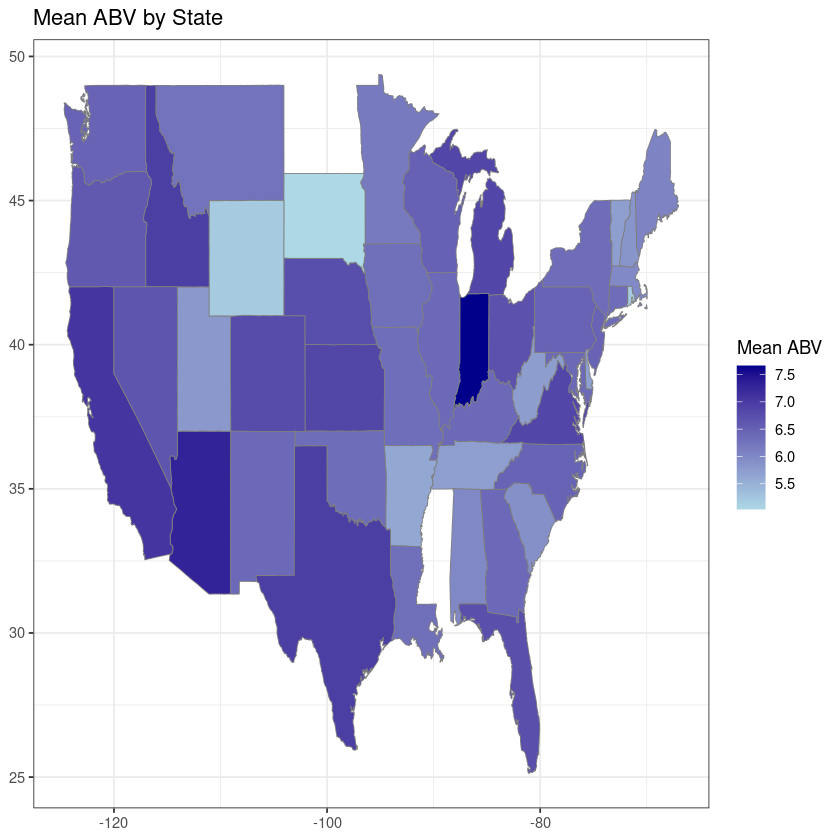

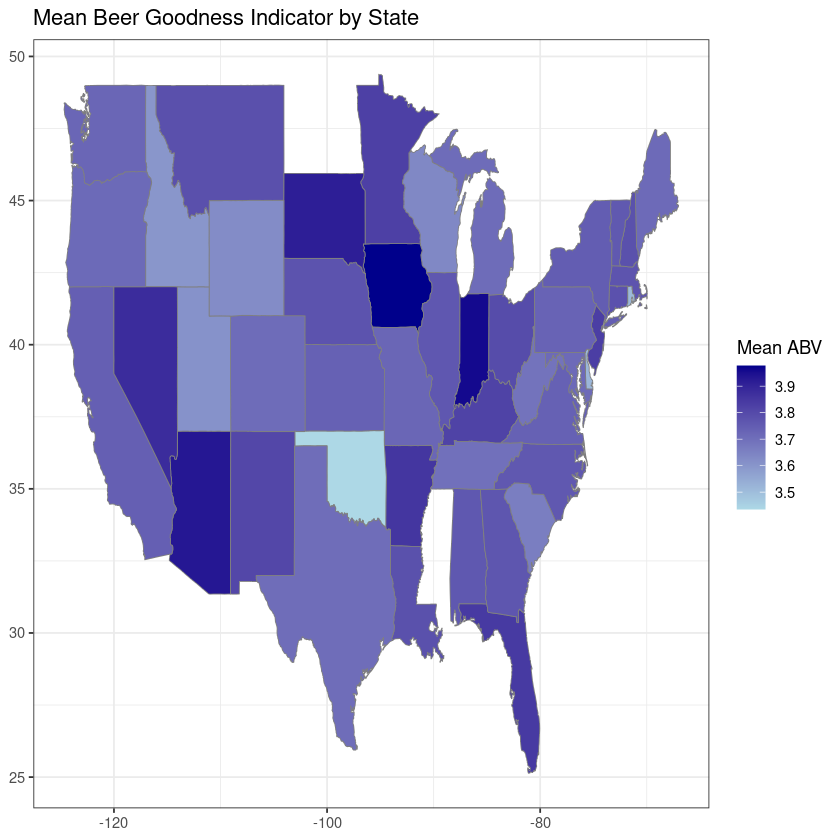

In [56]:
library(maps)

# beers_reviews_filtered_isgood

state_summary <- beers_reviews_filtered_isgood %>%
  group_by(state) %>%
  summarize(mean_abv = ifelse(n() > 1, mean(abv, na.rm = TRUE), NA_real_),
            mean_beer_goodness_indicator = ifelse(n() > 1, mean(beer_goodness_indicator, na.rm = TRUE), NA_real_))

state_summary <- state_summary %>%
  mutate(state = state_dict[state])
# state_summary

#rename state to region
state_summary <- state_summary %>%
  rename(region = state)

map_data <- map_data("state")

# Join the map data with the state summary data
# map_data_summary <- merge(state_summary, map_data, by.x="region", by.y="region", all.x=TRUE)
# change the previous line to use inner join
map_data_summary <- inner_join(state_summary, map_data, by = "region")

# map_data_summary

# # Plot the US map with the filled states
# us_map_filled <- ggplot() +
#   geom_map(data = map_data_summary, map = map_data_summary, aes(x = long, y = lat, map_id = region, fill = mean_abv), color = "gray50", size = 0.25) +
#   scale_fill_gradient(low = "lightblue", high = "darkblue") +
#   labs(x = NULL, y = NULL, title = "Mean ABV by State", fill = "Mean ABV") +
#   theme_bw()

# # us_map_filled <- ggplot() +
# #   geom_map(data=map_data, map=map_data, aes(x=long, y=lat, map_id=region), fill="#ffffff", color="#ffffff", size=0.15) +
# #   geom_map(data = state_summary, map = map_data, aes(x = long, y = lat, map_id = region, fill = mean_abv), color = "gray50", size = 0.25) +
# #   scale_fill_gradient(low = "lightblue", high = "darkblue") +
# #   labs(x = NULL, y = NULL, title = "Mean ABV by State", fill = "Mean ABV") +
# #   theme_bw()

# # Display the plot
# us_map_filled

  

us_map_points_abv <- ggplot() +
  geom_map(data = map_data_summary, map = map_data_summary, aes(x = long, y = lat, map_id = region, fill = mean_abv), color = "gray50", size = 0.25) +
  scale_fill_gradient(low = "lightblue", high = "darkblue") +
  labs(x = NULL, y = NULL, title = "Mean ABV by State", fill = "Mean ABV") +
  theme_bw()

us_map_points_beer_goodness_indicator <- ggplot() +
  geom_map(data = map_data_summary, map = map_data_summary, aes(x = long, y = lat, map_id = region, fill = mean_beer_goodness_indicator), color = "gray50", size = 0.25) +
  scale_fill_gradient(low = "lightblue", high = "darkblue") +
  labs(x = NULL, y = NULL, title = "Mean Beer Goodness Indicator by State", fill = "Mean ABV") +
  theme_bw()

# us_map_points_beer_goodness_indicator <- us_map +
#   geom_point(data = state_summary, aes(x = long, y = lat, size = mean_beer_goodness_indicator, color = mean_beer_goodness_indicator)) +
#   scale_color_gradient(low = "lightblue", high = "darkblue") +
#   ggtitle("Mean Beer Goodness Indicator by State") +
#   labs(size = "Mean Beer Goodness Indicator")

us_map_points_abv

us_map_points_beer_goodness_indicator

There is a weird change in South Dakota, Indiana, and wisconsin. THe lower average abv is correlated with the higher average rating. I would have expected the opposite.

## Pledge

By submitting this work I hereby pledge that this is my own, personal work. I've acknowledged in the designated place at the top of this file all sources that I used to complete said work, including but not limited to: online resources, books, and electronic communications. I've noted all collaboration with fellow students and/or TA's. I did not copy or plagiarize another's work.

> As a Boilermaker pursuing academic excellence, I pledge to be honest and true in all that I do. Accountable together – We are Purdue.